In [1]:
from diffpy.structure import loadStructure, Structure
from orix.crystal_map import Phase
from ase import io as aseio
import numpy as np
import pandas as pd

cif = [
    "Ni.cif",
    "Fe alpha.cif",  # cubic
    "Mg.cif",  # hexagonal
    "Ni4W.cif",  # tetragonal
    "ReS2.cif",  # triclinic
]

is_same_diffpy_orix_lattice = []
is_same_ase_orix_lattice = []
is_same_diffpy_orix_positions = []
is_same_ase_orix_positions = []

for i, c in enumerate(cif):
    d = loadStructure(c)
    o = Phase.from_cif(c)
    a = aseio.read(c)

    is_same_diffpy_orix_lattice.append(
        np.allclose(o.structure.lattice.base, d.lattice.base)
    )
    is_same_ase_orix_lattice.append(np.allclose(o.structure.lattice.base, a.cell.array))

    is_same_diffpy_orix_positions.append(
        np.allclose(o.structure.xyz_cartn, d.xyz_cartn)
    )
    is_same_ase_orix_positions.append(
        np.allclose(o.structure.xyz_cartn, a.get_positions())
    )

    if i == 1:
        break

# pd.DataFrame(data={'cif': [c[:-4].split()[0] for c in cif],
#                    'diffpy lattice': is_same_diffpy_orix_lattice,
#                    'diffpy positions': is_same_diffpy_orix_positions,
#                    'ase lattice': is_same_ase_orix_lattice,
#                    'ase positions': is_same_ase_orix_positions})

In [2]:
a[0].symbol, a[0].position
Phase()

from diffpy.structure import Lattice

Lattice()
a[0].scaled_position

array([0., 0., 0.])

In [3]:
from KED.structure import parse_structure

parse_structure(a)


from diffpy.structure import Atom as diffpyAtom

structure = a
phase = Phase(
    structure=Structure(
        atoms=[
            diffpyAtom(atype=atom.symbol, xyz=atom.scaled_position)
            for atom in structure
        ],
        lattice=Lattice(base=structure.get_cell().array),
    )
)
phase.structure

[Fe   0.000000 0.000000 0.000000 1.0000,
 Fe   0.500000 0.500000 0.500000 1.0000]

In [4]:
from KED.generator import CrystalDiffractionGenerator

gen = CrystalDiffractionGenerator(a, 200)
gen2 = CrystalDiffractionGenerator(o.structure, 200)

gen2

CrystalDiffractionGenerator {'Fe': 2.0}, Voltage=200 kV)

In [5]:
from KED.reciprocal_lattice import *

hkl = generate_hkl_points(15)
g = calculate_g_vectors(hkl, reciprocal_vectors(*gen2.structure.lattice.base))

sf = calculate_structure_factor(
    gen.structure,
    g,
    scale_by_scattering_angle=False,
    debye_waller=False,
)
sf2 = calculate_structure_factor(
    gen2.structure,
    g,
    scale_by_scattering_angle=False,
    debye_waller=False,
)

In [6]:
sf - sf2

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
      

In [8]:
np.allclose(gen2.structure.lattice.base, gen.structure.lattice.base)

True

In [9]:
gen2.structure.xyz_cartn - gen.structure.xyz_cartn

array([[0., 0., 0.],
       [0., 0., 0.]])

In [10]:
gen.structure.cell.volume, gen2.structure.lattice.volume

from KED.reciprocal_lattice import lattice_vectors_from_structure, reciprocal_vectors

reciprocal_vectors(*lattice_vectors_from_structure(gen.structure)), reciprocal_vectors(
    *lattice_vectors_from_structure(gen2.structure)
)

AttributeError: 'Structure' object has no attribute 'cell'

In [11]:
np.allclose(gen.reflection_intensity, gen2.reflection_intensity)

True

In [12]:
from KED.reciprocal_lattice import calculate_structure_factor

f = calculate_structure_factor(gen.structure, gen.g)
f2 = calculate_structure_factor(gen2.structure, gen2.g)

TypeError: 'NoneType' object is not iterable

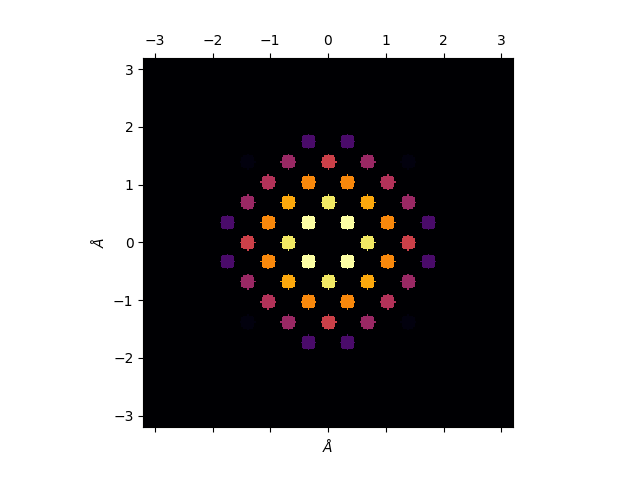

In [13]:
%matplotlib widget
from orix.quaternion import Orientation

# o = Orientation.random((10,))
o = Orientation.identity()

templates = gen.generate_templates(o, s_max=0.05)
patterns = templates.generate_diffraction_pattern((256, 256), 0.025, psf=5)

patterns.plot()

In [21]:
atoms = gen.structure

if isinstance(atoms, aseAtoms):
    positions = atoms.get_positions()
    cell = atoms.get_cell().array
elif isinstance(atoms, Structure):
    positions = atoms.xyz_cartn
    cell = atoms.lattice.base

temp = np.dot(g, cell)
np.allclose(np.dot(g, positions.T), np.dot(temp, atoms.get_scaled_positions().T))

True

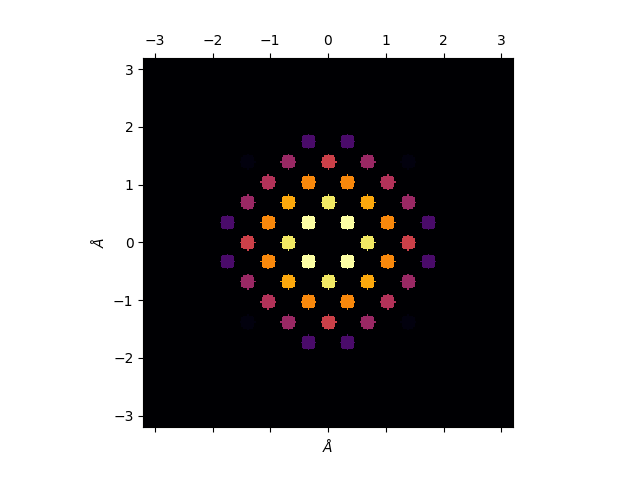

In [14]:
templates2 = gen2.generate_templates(o, s_max=0.05)
patterns2 = templates2.generate_diffraction_pattern((256, 256), 0.025, psf=5)

patterns2.plot()

In [56]:
from pathlib import Path

o = Phase.from_cif(Path(c))

TypeError: 'PosixPath' object is not subscriptable

In [47]:
o = Phase(structure=d)
o.structure.xyz_cartn

array([[ 3.01174951,  3.33703222,  3.42057721],
       [-1.43999651,  1.19077478,  3.31186179],
       [ 0.18799313,  3.48664225,  3.38029703],
       [ 1.38375987,  1.04116475,  3.35214197],
       [ 3.23457573, -0.04445283,  4.5503478 ],
       [ 3.14597856,  1.67093018,  1.79618779],
       [-0.12024937, -0.21537541,  4.7192243 ],
       [ 0.03808096,  1.92597655,  1.61661345],
       [ 1.53367204,  2.60183045,  5.11582555],
       [ 1.69200237,  4.74318241,  2.0132147 ],
       [-1.66282273,  4.57225983,  2.1820912 ],
       [-1.57422555,  2.85687681,  4.9362512 ]])

In [63]:
o

Orientation (1,) 1
[[1. 0. 0. 0.]]

In [39]:
from orix.vector import Vector3d
from orix.quaternion.symmetry import Oh

# v1 = Vector3d((1, 1, 1))
# v1 = Vector3d(np.random.randn(5, 3)).unit

from copy import deepcopy

symmetry = Oh
fs = symmetry.fundamental_sector
v = deepcopy(v1)

center = fs.center

if symmetry.name in ["321", "312", "32", "-4"]:
    idx = v.z < 0
    vv = symmetry[-1] * v[idx]
    if vv.size != 0:
        v[idx] = vv
    rot = symmetry[:3]
elif symmetry.name == "-3":
    idx = v.z < 0
    vv = symmetry[3] * v[idx]
    if vv.size != 0:
        v[idx] = vv
    rot = symmetry[:3]
else:
    rot = symmetry

rotated_centers = rot * center
closeness = v.dot_outer(rotated_centers).round(12)
idx_max = np.argmax(closeness, axis=-1)
v2 = ~rot[idx_max] * v

# Keep the ones already inside the sector
mask = v <= fs
v2[mask] = v[mask]

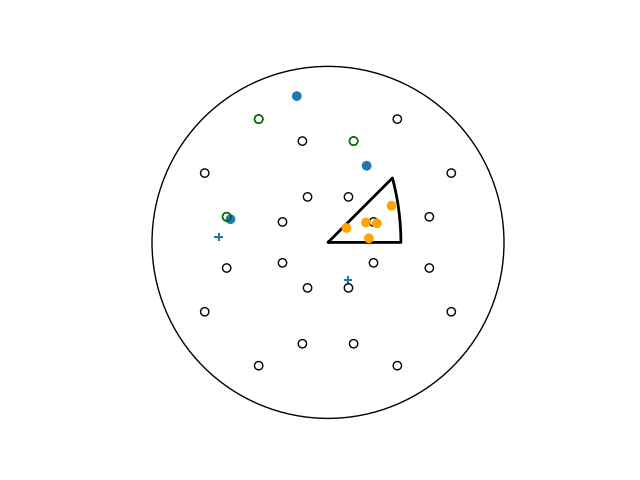

In [52]:
from matplotlib import pyplot as plt

fig = v1.scatter(reproject=1, return_figure=True)
rotated_centers.scatter(figure=fig, fc="None", ec="k")

rotated_centers[idx_max].scatter(figure=fig, fc="None", ec="g")
v2.scatter(figure=fig, c="orange")

fig.axes[0].plot(fs.edges)

In [53]:
fs.edges

Vector3d (378,)
[[0.0031 0.0031 1.4142]
 [0.     0.     1.    ]
 [0.0031 0.     1.    ]
 ...
 [0.022  0.022  1.4139]
 [0.0157 0.0157 1.414 ]
 [0.0094 0.0094 1.4142]]